<a href="https://colab.research.google.com/github/Andrey-Berezin/neural_networks/blob/main/neural_networks_final_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
import numpy as np
np.random.seed(12)
# Model
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.optimizers import SGD 
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from keras.utils import np_utils
import matplotlib.pyplot as plt
# Загрузка данных
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Нормализация данных и преобразование размерности
X_train = X_train.reshape((60000,28,28,1)).astype('float32') / 255
X_test = X_test.reshape((10000,28,28,1)).astype('float32') /255
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# Преобразование правильных ответов по категориям
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)


11501568/11490434 [==============================] - 1s 0us/step


In [ ]:
def get_model():
  
    model = Sequential()                                                                         
    model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
    model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.5))
    model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
    model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation = 'softmax'))

    model.compile(optimizer = 'adam',
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])
    
    return model

In [ ]:
model = get_model()
model.summary()

history = model.fit(X_train, y_train, 
                    epochs=10, batch_size=150, validation_split = 0.1, verbose = 1)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 4, 4, 64)        

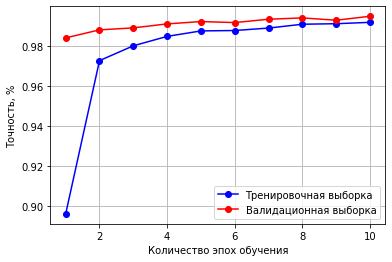

In [ ]:
#график точности во время обучения
x = range(1, 11)

plt.grid(True)

plt.plot(x, 
         history.history['accuracy'], 
         'bo-', 
         label='Тренировочная выборка')

plt.plot(x, 
         history.history['val_accuracy'],
         'ro-',
         label='Валидационная выборка')

plt.xlabel('Количество эпох обучения')
plt.ylabel('Точность, %')

plt.legend(loc='lower right')

In [ ]:
#запись результатов точности на тренировочной выборке
f1 = open("test_accuracy1.txt", 'w')
a = history.history['accuracy']
b = history.history['val_accuracy']
f1.write("Точность на тренировочной выборке\n")
f1.writelines("%f\n" % i for i in a)
f1.write("\n")
f1.write("Точность на валидационной выборке\n")
f1.writelines("%f\n" % i for i in b)
f1.close()

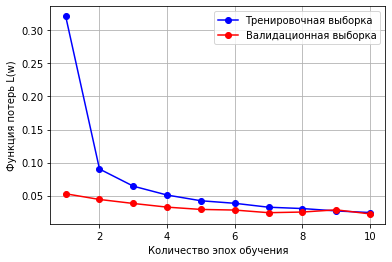

In [ ]:
#график ошибки во время обучения
x = range(1, 11)

plt.grid(True)

plt.plot(x, 
         history.history['loss'], 
         'bo-', 
         label='Тренировочная выборка')

plt.plot(x, 
         history.history['val_loss'],
         'ro-',
         label='Валидационная выборка')

plt.xlabel('Количество эпох обучения')
plt.ylabel('Функция потерь L(w)')

plt.legend(loc='upper right')

In [ ]:
#запись результатов функции потерь на тренировочной выборке
f2 = open("test_loss1.txt", 'w')
c = history.history['loss']
d = history.history['val_loss']
f2.write("Ошибка на тренировочной выборке\n")
f2.writelines("%f\n" % i for i in c)
f2.write("\n")
f2.write("Ошибка на валидационной выборке\n")
f2.writelines("%f\n" % i for i in d)
f2.close()

In [ ]:
#проверка сети на тестовой выборке
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0157 - accuracy: 0.9941
Test loss: 0.0157456174492836
Test accuracy: 0.9940999746322632


In [ ]:
#метод для загрузки данных
def initialize():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    X_test = X_test.reshape((10000,28,28,1)).astype('float32') /255
    X_train = X_train.reshape((60000,28,28,1)).astype('float32') / 255
    X_train.shape, X_test.shape, y_train.shape, y_test.shape
    y_train = np_utils.to_categorical(y_train, 10)
    y_test = np_utils.to_categorical(y_test, 10)
    return X_test

In [ ]:
#рандомное закрашивание пикселов изображения
def deform_random(X_test, size):
    if size == 0: 
        return X_test
    for i in range(10000):
        array = random_array(size)
        for j in array:
            for k in range(0,28):
                X_test[i][j][k] = 0
    return X_test

In [ ]:
#генерация рандомного массива заданной длины из неповторяющихся чисел
def random_array(size):
    array = np.unique(np.random.randint(0, 27, size))
    while size != len(array) :
        num = np.random.randint(0, 27)
        array = np.unique(np.append(array, num))
    return array

[ 9 17 25]


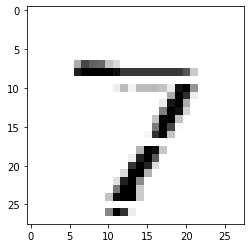

In [ ]:
#изображение деформированных цифр
init = initialize()
count = 3
num_image = 0
x_test_sample_deform = deform_random(init, count)
x_test_sample_deform = x_test_sample_deform.reshape((10000,28,28))
plt.imshow(x_test_sample_deform[num_image], cmap=plt.get_cmap('gray_r'))

In [ ]:
#тест сети на деформированных данных
array_acc = []
array_loss = []
for i in range(0, 28):
    x = initialize()
    X_test_deform = deform_random(x , i)
    score = model.evaluate(X_test_deform, y_test)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    array_loss = np.append(array_loss, score[0])
    array_acc = np.append(array_acc, score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0157 - accuracy: 0.9941
Test loss: 0.0157456174492836
Test accuracy: 0.9940999746322632
313/313 [==============================] - 1s 3ms/step - loss: 0.0325 - accuracy: 0.9885
Test loss: 0.0324685163795948
Test accuracy: 0.9884999990463257
313/313 [==============================] - 1s 3ms/step - loss: 0.0652 - accuracy: 0.9783
Test loss: 0.06519367545843124
Test accuracy: 0.9782999753952026
313/313 [==============================] - 1s 3ms/step - loss: 0.1293 - accuracy: 0.9589
Test loss: 0.129316046833992
Test accuracy: 0.958899974822998
313/313 [==============================] - 1s 3ms/step - loss: 0.2385 - accuracy: 0.9219
Test loss: 0.23845602571964264
Test accuracy: 0.9218999743461609
313/313 [==============================] - 1s 3ms/step - loss: 0.3787 - accuracy: 0.8806
Test loss: 0.3787042796611786
Test accuracy: 0.8805999755859375
313/313 [==============================] - 1s 3ms/step - loss: 0.5532 - accuracy: 

In [ ]:
#запись точности в файл
f3 = open("test_result_deform.txt", 'w')
f3.write("Точность с учетом деформации")
f3.writelines("%f\n" % i for i in array_acc)
f3.close()

In [ ]:
#запись ошибки в файл
f4 = open("test_result_deform_loss.txt", 'w')
f4.write("Ошибка с учетом деформации")
f4.writelines("%f\n" % i for i in array_loss)
f4.close()

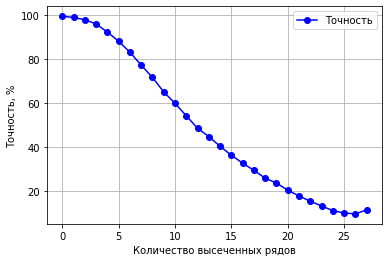

In [ ]:
#график точности для искаженных цифр
t = range(28)

plt.grid(True)

plt.plot(t, 
         array_acc*100, 
         'bo-', 
         label='Точность')
plt.xlabel('Количество высеченных рядов')
plt.ylabel('Точность, %')

plt.legend(loc='upper right')

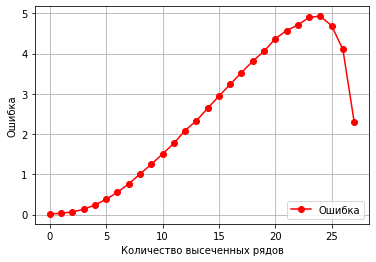

In [ ]:
#график ошибки для искаженных цифр
t = range(28)

plt.grid(True)

plt.plot(t, 
         array_loss, 
         'ro-', 
         label='Ошибка')
plt.xlabel('Количество высеченных рядов')
plt.ylabel('Ошибкa')

plt.legend(loc='lower right')

In [ ]:
#сохранение модели
model.save('my_model_final.h5')


In [ ]:
#model = load_model('my_model_final.h5')